# Python Plotly

## Documentation (excellent resources)
- [Main Docs](https://plotly.com/python/)
- [Fundamentals](https://plotly.com/python/plotly-fundamentals/)
    - includes title, axis, legends, fonts, ticks, size, config, scales, etc.
- [Basic Charts](https://plotly.com/python/basic-charts/)
- [Statistical Charts](https://plotly.com/python/statistical-charts/)
- [Scientific Charts](https://plotly.com/python/scientific-charts/)
- [Financial Charts](https://plotly.com/python/financial-charts/)
- [Maps](https://plotly.com/python/maps/)
- [3D Charts](https://plotly.com/python/3d-charts/)
- [Subplots](https://plotly.com/python/subplot-charts/)

## Setup/Installation

```python
# install via pip (current version as of this writing was 4.7.1)
pip install plotly==4.7.1

# ... or conda
conda install -c plotly plotly=4.7.1

# jupyter notebook support via pip
pip install "notebook>=5.3" "ipywidgets>=7.2"

# ... or conda
conda install "notebook>=5.3" "ipywidgets>=7.2"

# jupyterlab support via pip
pip install jupyterlab "ipywidgets>=7.5"

# ... or conda
conda install jupyterlab "ipywidgets=7.5"

# may need to add these additional commands to display widgets properly
jupyter labextension install @jupyter-widgets/jupyterlab-manager
pip install nbserverproxy
jupyter serverextension enable --py nbserverproxy
# restart all kernels or shut down then restart to show widgets

# additional commands for jupyterlab support (requires nodejs already installed)
# jupyterlab renderer support
jupyter labextension install jupyterlab-plotly@4.7.1

# OPTIONAL: jupyterlab widgets extension
jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.7.1

# OPTIONAL: static image export (and in-line svg renderer)
conda install -c plotly plotly-orca
conda install -c plotly plotly-orca==1.2.1 psutil requests
```

- If you receive a message that a notebook 'is not trusted' and plots are not displaying
    - shutdown the notebook and go to the cmd prompt
    - in the cmd prompt, navigate to the folder containing the ipynb file
    - execute `jupyter trust filename.ipynb`

#### Additional Setup Info
- Can be found [here](https://plotly.com/python/getting-started/)
- Additional support for
    - static image export
    - extended geo support (for maps)
    - chart studio support (for uploading figures to Plotly's Chart Studio Cloud or On-Prem svcs.

## About Plotly
- Plotly.py actually passes JSON data to plotly.js
- Python dictionaries are easily serialized to this format
- Keys
    - `data`
        - stores values (lists) which describe a trace or traces that make up a figure
        - each trace is a dictionary, data can be a list of such dictionaries
        - specify the type of trace with the `type` key
        - other keys specify properties for that `type` (x, y, etc)
    - `layout`
        - stores a dictionary that customizes figure appearance
        - items here apply to all traces listed in `data`
        - see the [Full Reference](https://plot.ly/python/reference/?_ga=2.81549781.373116655.1589371569-1803719125.1588090860) for descriptions of all the supported trace and layout attributes and configuration options
            - using full reference above can be cumbersome (there are a ton of options!)
            - using Graph Objects provides assistance by aggregating available options and providing validation

## Dash
- Every `fig.show()` command can render the same figure in a Dash app
    - simply pass it to the `figure=fig` arg of the `dcc.Graph` component in a Dash app

In [1]:
# standard imports

# graph objects
import plotly.graph_objects as go

# plotly input/output
import plotly.io as pio

# make subplots function
from plotly.subplots import make_subplots

# plotly express (if using)
import plotly.express as px

# plotly figure factories (if using)
import plotly.figure_factory as ff

In [2]:
# other package imports
import numpy as np
import pandas as pd

## Displaying Figures
1. Use the renderers framework in a script/notebook
2. Use Dash
3. Use `FigureWidget` in an `ipywidgets` context

#### 1. Use the Renderers Framework in a Script/Notebook
- Good way to view quickly
- Use `.show()` method on a graph object figure

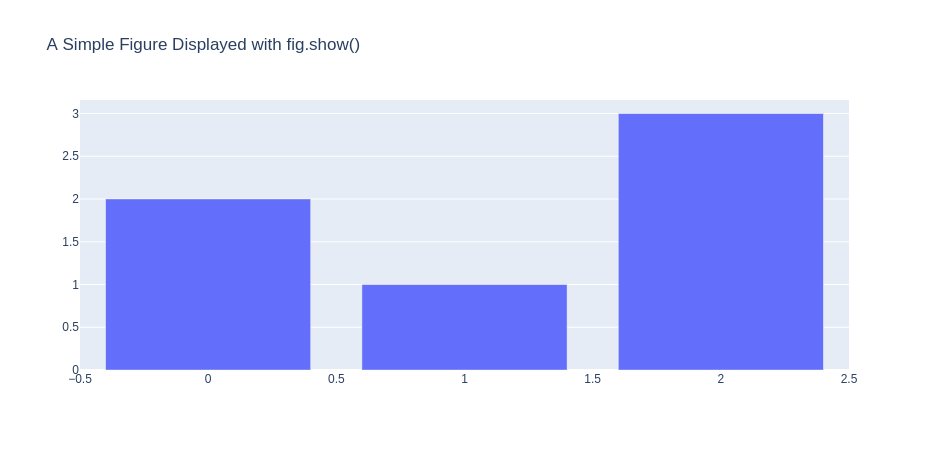

In [3]:
# create a very basic plot
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text='A Simple Figure Displayed with fig.show()'
)

# show the plot
# in many situations, could omit the .show() and just call fig
fig.show()

- Setting the Default Renderer

In [4]:
# display the default renderer

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [5]:
# can change a default renderer
# these changes to do not survive session restarts (or kernel restarts)
pio.renderers.default='browser'

# now all new calls to fig.show() will render in a new tab of the default browser

In [6]:
# illustrate
# fig.show()

In [7]:
# change back to the default renderer to display plots inline in jupyter lab
pio.renderers.default='plotly_mimetype+notebook'

In [8]:
# verify
# fig.show()

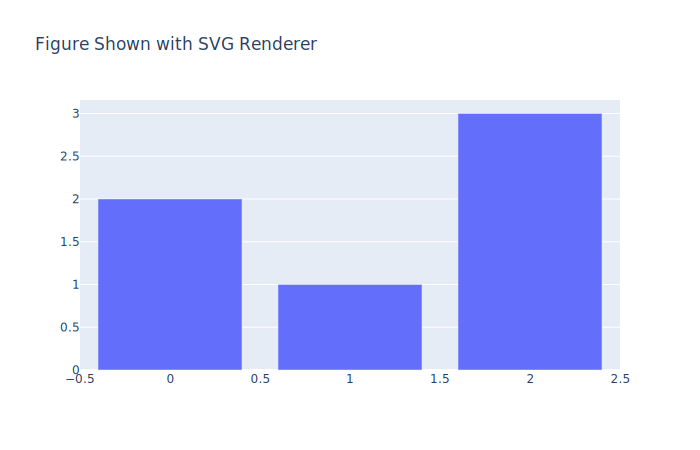

In [9]:
# can also override the default renderer on the fly
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text='Figure Shown with SVG Renderer'
)
fig.show(renderer='svg')

- Built-in Renderers
    - Interactive Renderers
        - `notebook` for use with jupyter notebook (not jupyter lab) and works without an internet connection
        - `notebook_connected` internet connection required
        - `colab` custom renderer for Google Colab
        - `browser` python kernel must be on same machine as browser to open (not compatible with Jupyter Hub or online notebook svcs)
            - `firefox`, `chrome`, `chromium` same as above, but forces the use of a specific browser
        - `plotly_mimetype` creates a MIME-type bundle
            - Jupyterlab, nteract, and VS Code notebook interface
    - Static Renderers (all rely on orca)
        - `png`, `svg`, and `jpeg` output as those file formats
        - `PDF` especially useful when exporting as PDF using LaTeX export capabilities of [nbconvert](https://nbconvert.readthedocs.io/en/latest/)
        - `JSON` displays the JSON representation of a figure in collapsible interactive tree structure
    - Multiple Renderer Support
        - join renderers with a '+'
            - `'notebook+plotly_mimetype+pdf'`

In [10]:
# getting the docs for a renderer
png_renderer = pio.renderers['png']
png_renderer

PngRenderer(width=700, height=450, scale=None)

    Renderer to display figures as static PNG images.  This renderer requires
    the orca command-line utility and is broadly compatible across IPython
    environments (classic Jupyter Notebook, JupyterLab, QtConsole, VSCode,
    PyCharm, etc) and nbconvert targets (HTML, PDF, etc.).

    mime type: 'image/png'
    

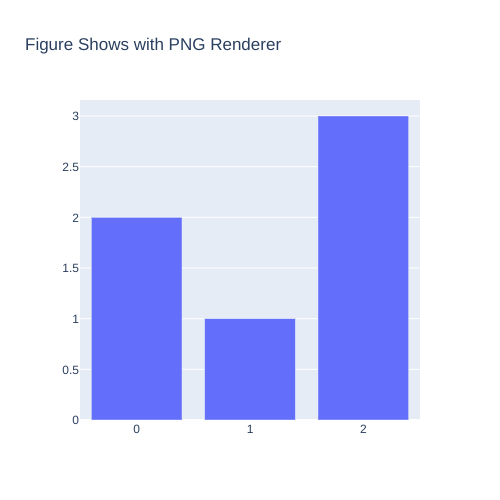

In [11]:
# can edit the parameters that are specified
png_renderer.width = 500
png_renderer.height = 500

# alter fig params on the fly
# for list of options, use help(fig)
fig.layout.title = 'Figure Shows with PNG Renderer'

fig.show('png')

In [12]:
# read the docs on a figure object to find methods/attributes
# used this to find the attribute to change the plot title on the fly
# help(fig)

In [13]:
# reset png defaults
png_renderer.width = 700
png_renderer.height = 450

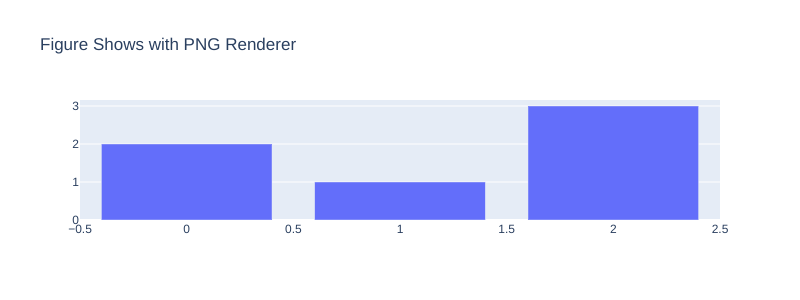

In [14]:
# can override defaults too
fig.show(renderer='png', width=800, height=300)

#### Diplaying Figures Using ipywidgets
- Works just like a figure object, but since it's an ipywidgets object, you can display it alongside other ipywidgets to build user interfaces in the notebook
- See [Plotly FigureWidget Overview](https://plot.ly/python/figurewidget/?_ga=2.110623175.373116655.1589371569-1803719125.1588090860) for more info
- Do **NOT** use the `.show()` method or `plotly.io.show` function to display these
- See the (*very*) basic syntax below
    - More info [here](https://plotly.com/python/figurewidget/?_ga=2.113860165.373116655.1589371569-1803719125.1588090860)

In [15]:
# verify ipywidgets are working
# plotly widgets sometimes still have bugs and may not display
import ipywidgets
ipywidgets.IntSlider()

IntSlider(value=0)

In [16]:
# create a simple FigureWidget
f = go.FigureWidget()

In [17]:
# to display the widget
f

FigureWidget({
    'data': [], 'layout': {'template': '...'}
})

In [18]:
# to add to the widget without repeating a display, add ; at the end of the line
# commands below update the figure above without redrawing it
f.add_scatter(y=[2, 1, 4, 3]);

In [19]:
f.add_bar(y=[1, 4, 3, 2]);

In [20]:
f.layout.title = 'Hello FigureWidget';

#### Construct a FigureWidget from a Figure graph object
- A standard figure object can be passed to the FigureWidget constructor

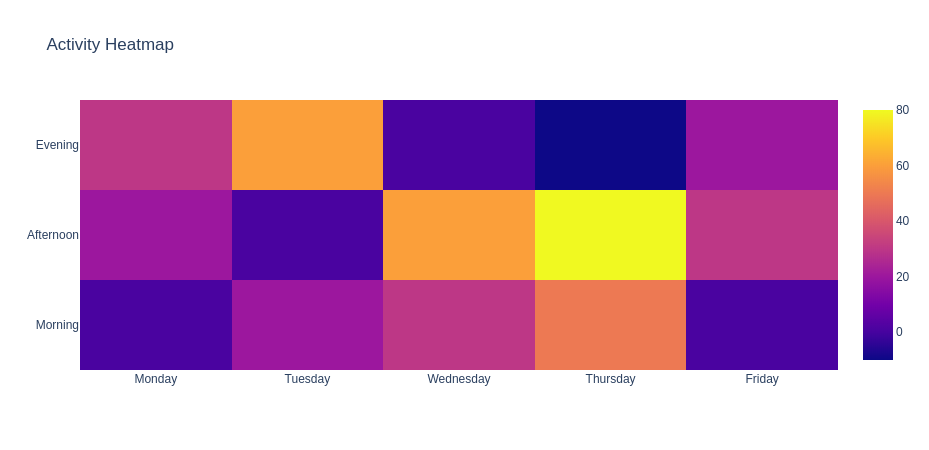

In [21]:
# basic heatmap

# z arrays represent the five values for days of the week
# 3 z arrays for each of the three y values
trace = go.Heatmap(z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                  x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                  y=['Morning', 'Afternoon', 'Evening'])

# can synthesize a figure in pieces like this
data=[trace]
layout = go.Layout(title='Activity Heatmap')
figure = go.Figure(data=data, layout=layout)

f2 = go.FigureWidget(figure)
f2.show()

## Figures as Dictionaries
- Requires you to specify everything correctly using the [Full Reference](https://plot.ly/python/reference/?_ga=2.114515653.373116655.1589371569-1803719125.1588090860)
- Can only use options that apply to the figure you're creating
- This is tedious, small example below

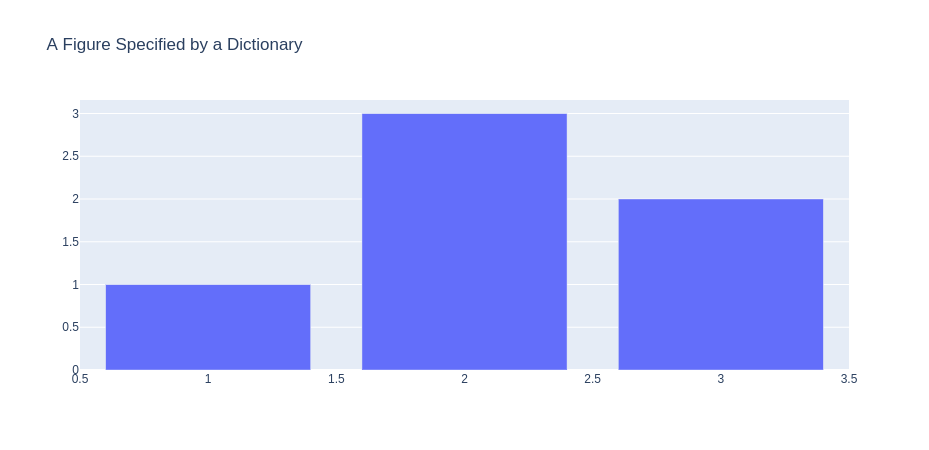

In [22]:
fig = dict({
    'data': [{'type': 'bar',
             'x': [1, 2, 3],
             'y': [1, 3, 2]}],
    'layout': {'title': {'text': 'A Figure Specified by a Dictionary'}}
})

# display dictionary figures is different
# import plotly.io as pio (already did this)

pio.show(fig)

## Graph Objects
- View docstrings for descriptions of valid properties for each type
- Access properties using `fig['layout']` or `fig.layout`
- Must import graph objects to use them

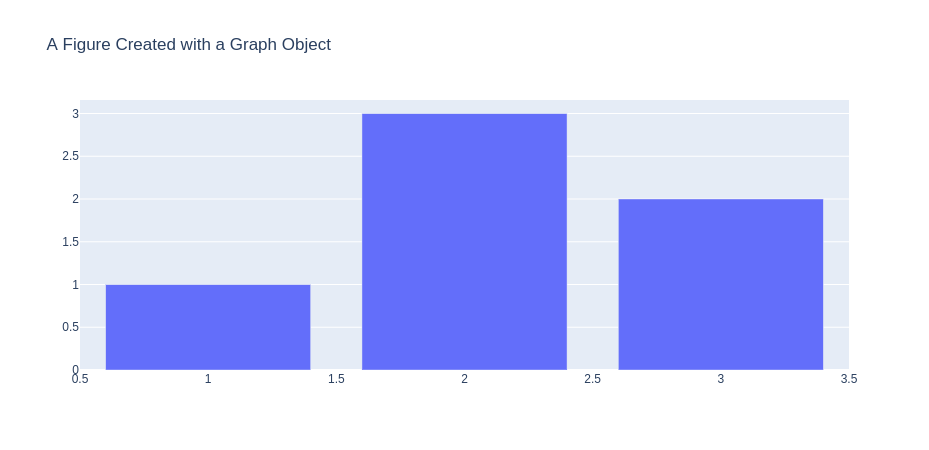

In [23]:
# same figure as above created with a graph object
# this way is usually better

fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    layout=go.Layout(
        title=go.layout.Title(text='A Figure Created with a Graph Object')
    )
)

fig.show()

- Can also pass a dictionary representation to the `go.Figure` constructor
- Can create JSON and DICT representations of figures
    - `fig.to_dict()`
    - `fig.to_json()`

## Plotly Express
- [Plotly Express](https://plot.ly/python/plotly-express/?_ga=2.42711527.373116655.1589371569-1803719125.1588090860) is a high-level API that produces graph object figures
- Simplifies construction to a point (see below)

In [24]:
# must import plotly.express as px (already done)

# there are built-in datasets
df = px.data.iris()
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', title='A Poltly Express Figure')

# the fig is constructed as a graph object, inspecting will show as such
print(fig)

Figure({
    'data': [{'hovertemplate': 'species=setosa<br>sepal_width=%{x}<br>sepal_length=%{y}<extra></extra>',
              'legendgroup': 'setosa',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'setosa',
              'showlegend': True,
              'type': 'scatter',
              'x': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. , 3. ,
                          4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4, 3.5,
                          3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3,
                          3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3]),
              'xaxis': 'x',
              'y': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8, 4.3,
                          5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. , 5. , 5.2,
                          5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.

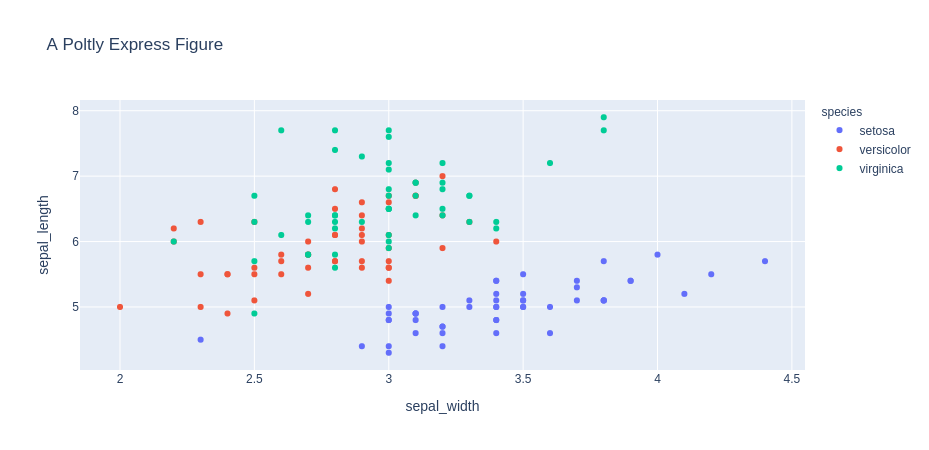

In [25]:
# show the figure
fig.show()

## Figure Factories
- [Figure Factories](https://plotly.com/python/figure-factories) are functions that produce graph object figures that are specialized
- See quiver plot below

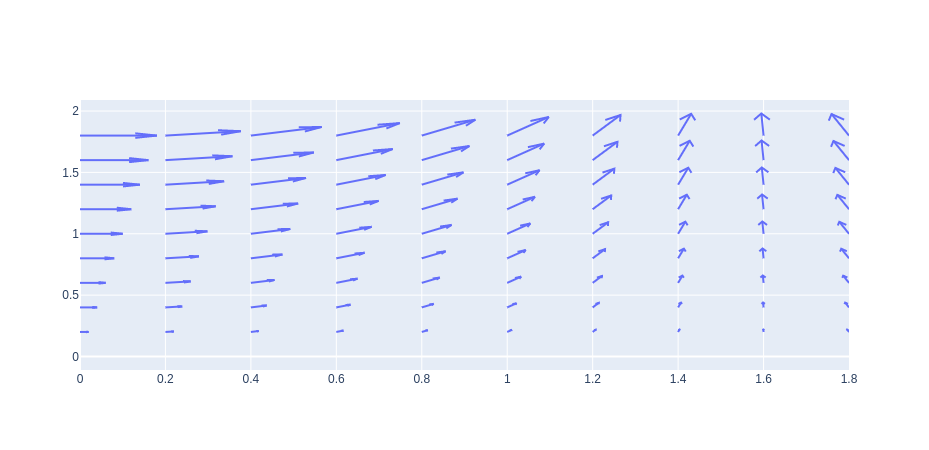

In [26]:
# quiver plot
x1, y1 = np.meshgrid(np.arange(0, 2, 0.2), np.arange(0, 2, 0.2))
u1 = np.cos(x1)*y1
v1 = np.sin(x1)*y1

fig = ff.create_quiver(x1, y1, u1, v1)

fig.show()

## Subplots
- The `make_subplots()` function will preconfigure a grid of subplots (can add traces to the subplots using `add_trace()`
- Must `from plotly.subplots import make_subplots`
- With `plotly.express`
    - Specify `facet_row=` or `facet_col=`
        - if using `df` as the data, give a column name as the value to split the plots by this variable
        - example of this below the **Updating Figures** header with iris data to split columns by species

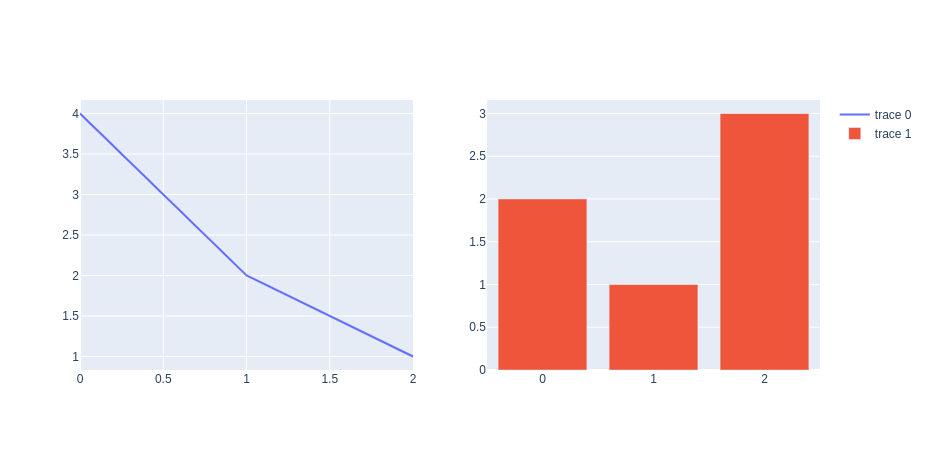

In [27]:
# subplots constructed by adding traces

# specify the number of rows and columns for your subplots
fig = make_subplots(rows=1, cols=2)

# add traces to the figure, specify the location in the subplot with row=/col=
fig.add_trace(go.Scatter(y=[4, 2, 1], mode='lines'), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

fig.show()

## Updating Figures
- No matter how a figure was constructed, you can modify it by adding traces or modifying properties
- Adding Traces
    - `add_trace()` method
    - adds a layer on top of the current figure
        - sequential, so order matters, last layer on top
    - when using `add_trace()` with subplots, use args `row=` and `col=` to specify where

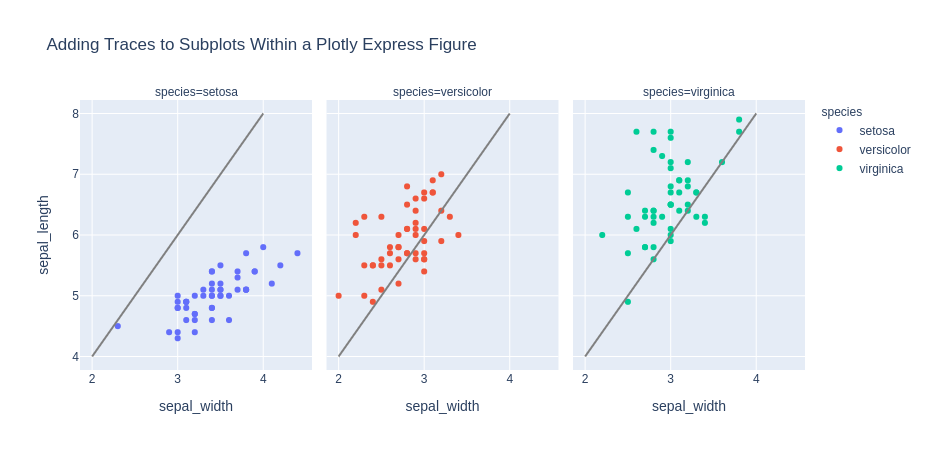

In [28]:
# using plotly express to create subplots using facet_col, then adding a reference line to each subplot

# load the built-in dataset
df = px.data.iris()

# use plotly express to create three subplots by species
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', facet_col='species',
                title='Adding Traces to Subplots Within a Plotly Express Figure')

# build a reference line to add to the subplots
ref_line = go.Scatter(x=[2, 4],
                     y=[4, 8],
                     mode='lines',
                     line=go.scatter.Line(color='gray'),
                     showlegend=False)

# add the traces to each subplot
fig.add_trace(ref_line, row=1, col=1)
fig.add_trace(ref_line, row=1, col=2)
fig.add_trace(ref_line, row=1, col=3)

#### Add Trace Convenience Methods
- Instead of `add_trace(go.Scatter...)` or `t1 = go.Scatter()` + `fig.add_trace(t1)`
    - Use `fig.add_scatter()` with the params needed
    - Built-in methods like this for other plot types too

## Magic Underscore Notation
- Compare the two different notations in the plots below

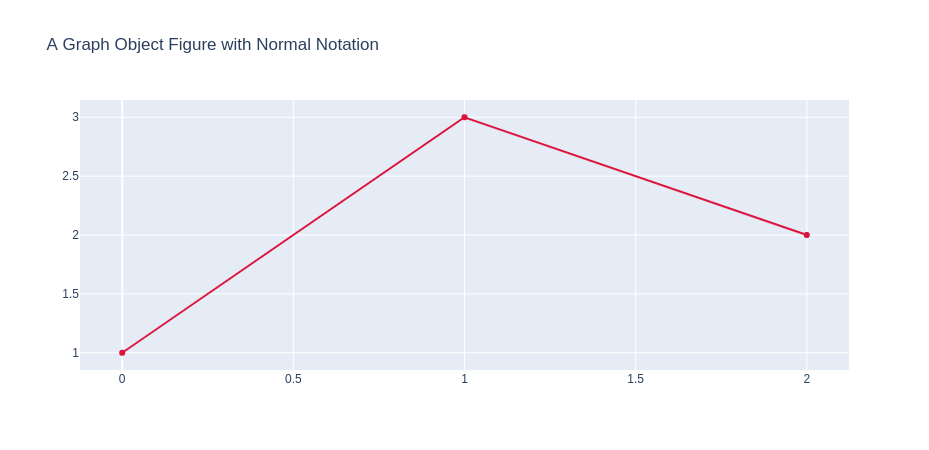

In [29]:
# create two identical plots, one without magic underscore notation and the other with

# use '' when the property is a dictionary key
# do not use '' when the property is an argument to the function or method

fig = go.Figure(
    
    # the line color is awkward here
    # it could also be line={'color': 'crimson'}
    data=[go.Scatter(y=[1, 3, 2], line=dict(color='crimson'))],
    
    # this is the cumbersome line
    # layout=dict(title=dict(text='A Graph Object Figure with Normal Notation'))    # as another option
    layout={'title': {'text': 'A Graph Object Figure with Normal Notation'}}
)

fig.show()

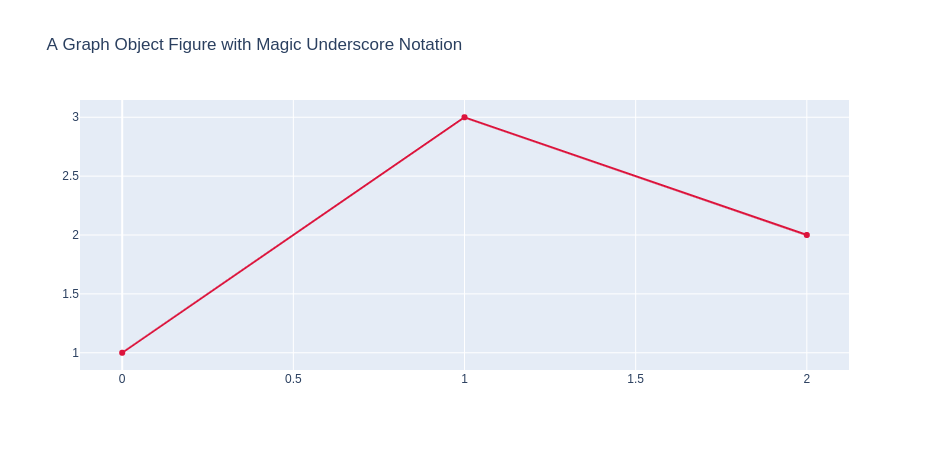

In [30]:
# create two identical plots, one without magic underscore notation and the other with

fig = go.Figure(
    data=[go.Scatter(y=[1, 3, 2], line_color='crimson')],
    
    # use 'magic underscore notation' to access nested properties
    layout_title_text = 'A Graph Object Figure with Magic Underscore Notation'
)

fig.show()

## Updating Figure Layouts
- Use `.update_layout()` method combined with 'magic underscore notation' to simply figure construction 

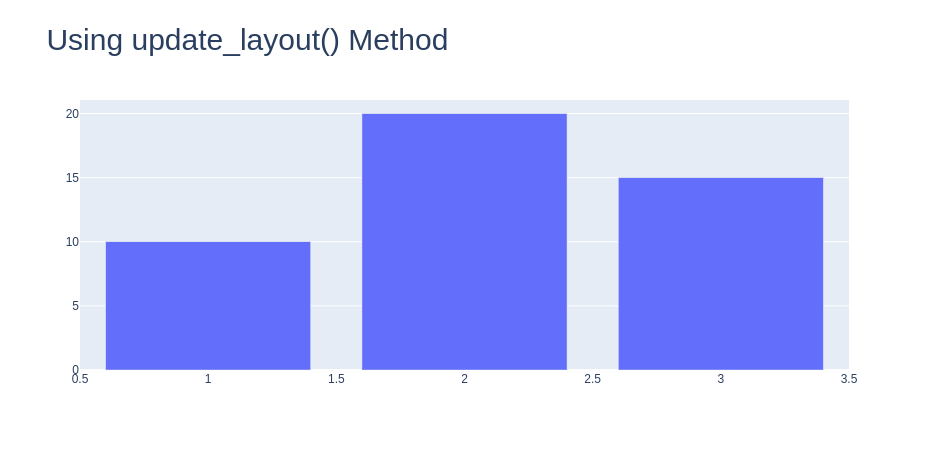

In [31]:
# figure with an updated layout

fig = go.Figure(data=go.Bar(x=[1, 2, 3], y=[10, 20, 15]))

# update the layout using underscore notation
fig.update_layout(title_text='Using update_layout() Method', title_font_size=30)

fig.show()

## Update Traces
- The `.update_traces()` method will update all traces for a figure
    - e.g. `fig.update_traces(marker_color='RoyalBlue')`
    - all traces have marker colors updated to 'RoyalBlue'
- Use the selector to specify which traces to update
    - e.g. `fig.update_traces(marker_color='RoyalBlue', selector={'type': 'bar'})
    - syntax above will only modify the type='bar' traces and not the other traces
    - `selector` value is a dictionary specifying the properties and values to modify
        - `selector={'marker_color': 'RoyalBlue'}` only changes the royal blue markers
- To modify certain subplots only
    - just add args to `.update_traces()`
    - `fig.update_traces({'marker': 'RoyalBlue'}, col=2)` only modifies subplot col 2

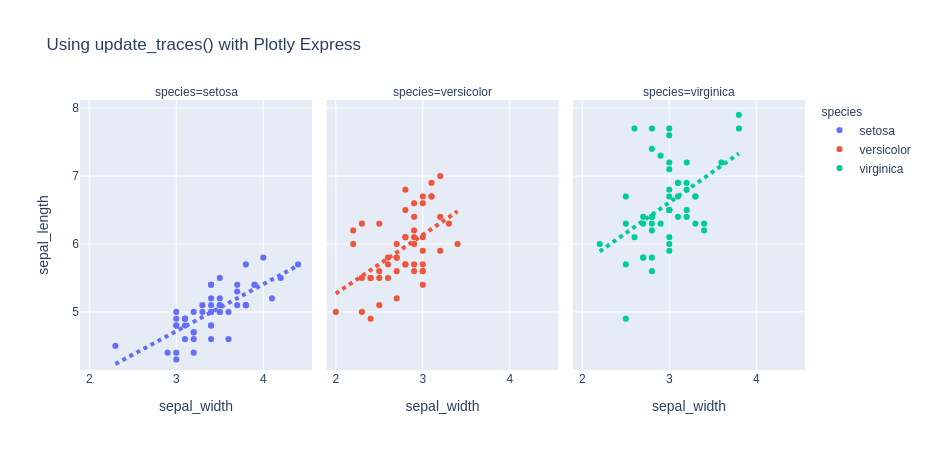

In [32]:
# updating traces in plotly express figures

fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                 # trendline will be added for each subplot
                facet_col='species', trendline='ols', title='Using update_traces() with Plotly Express')

# update all subplots of the figure
fig.update_traces(
    line=dict(dash='dot', width=4),
    selector=dict(type='scatter', mode='lines')
)

fig.show()

#### Conditional trace updates
- Must use `.for_each_trace()` method
    - the first arg accepts a function that updates one trace at a time
    - can also include `selector`, `row`, and `col` args

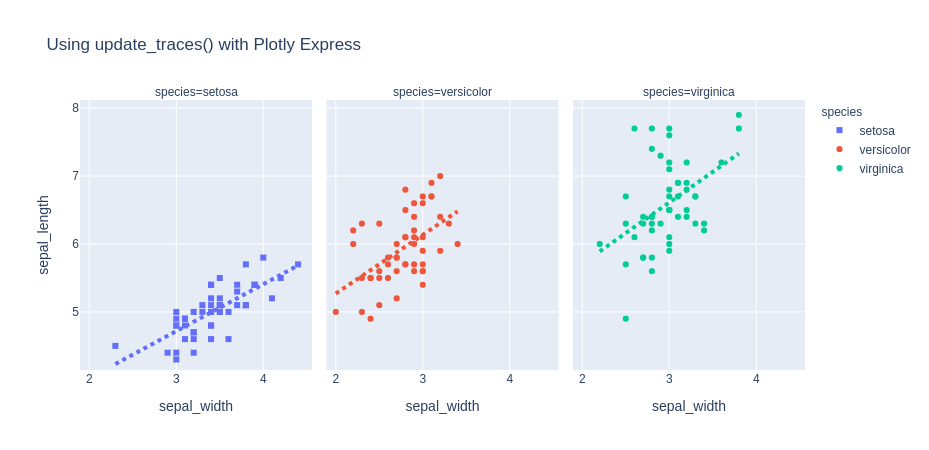

In [33]:
# conditional trace updates

# use for_each_trace
fig.for_each_trace(
    # lambda functions work well here
    lambda trace: trace.update(marker_symbol='square') if trace.name == 'setosa' else (),
)

fig.show()

#### Update figure axes
- Use `.update_xaxes()` and `.update_yaxes()`
- Also available are `for_each_xaxis()` and `for_each_yaxis()`

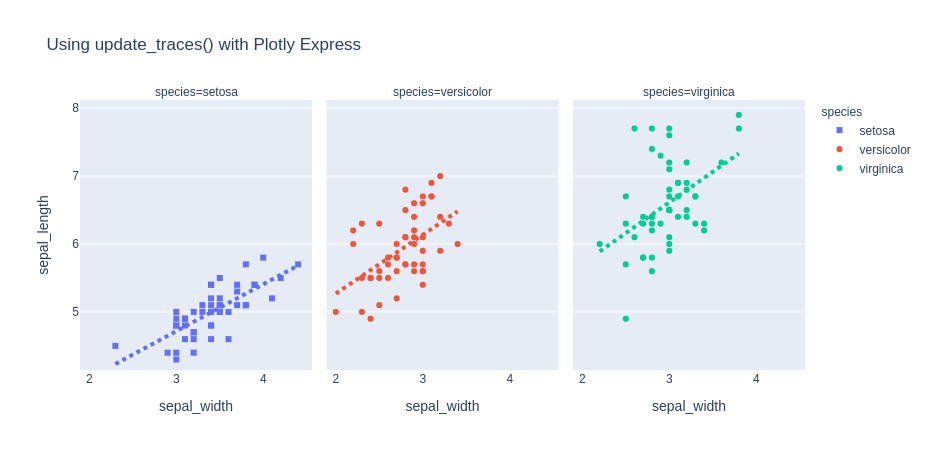

In [34]:
# remove gridlines
fig.update_xaxes(showgrid=False)

fig.show()

#### Chaining Updates
- You can chain update statements together, and even chain `.show()`

#### Property Assignment
- You don't have to use update, instead you can just modify properties

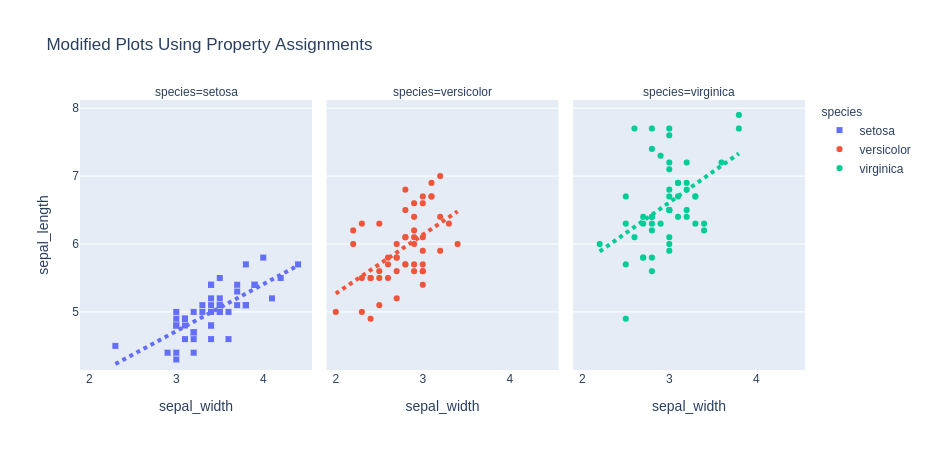

In [35]:
# changing the title and adding vertical gridlines back in
fig.layout.title.text='Modified Plots Using Property Assignments'

fig.show()

## Plotly Express Tools

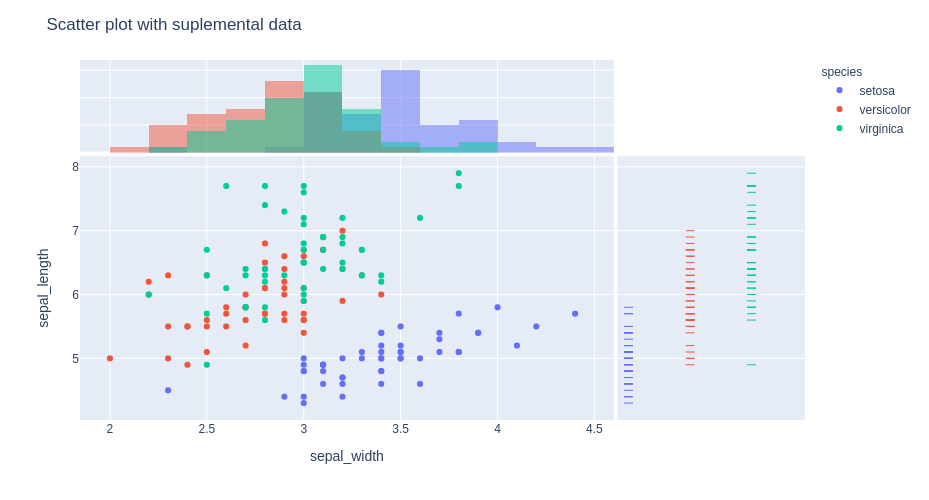

In [36]:
# adding histogram and rug plots to supplement the primary plot using marginal_x and marginal_y
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', marginal_y='rug', marginal_x='histogram')
fig.layout.height=500
fig.layout.title='Scatter plot with suplemental data'
fig

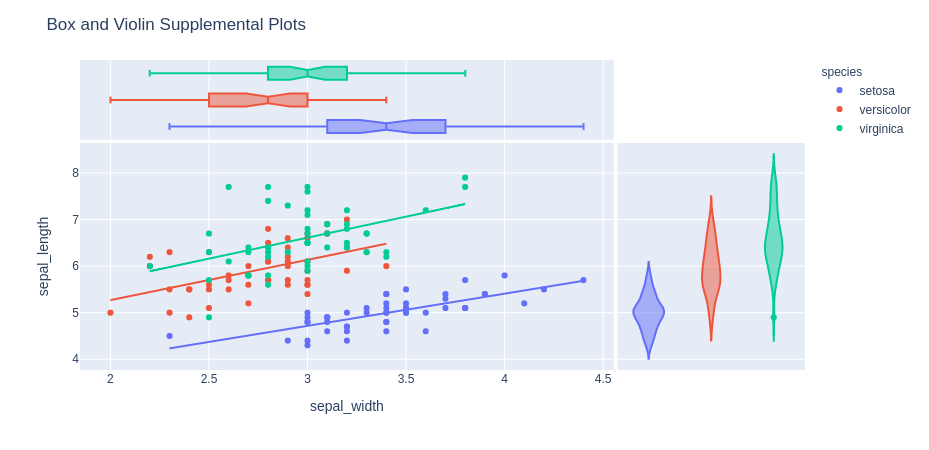

In [37]:
# including different supplemental marginal plots
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species', marginal_y='violin', 
                 marginal_x='box', trendline='ols')
fig.layout.title='Box and Violin Supplemental Plots'
fig.show()